In [1]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install descartes
!pip install geopandas
!pip install cartopy
!pip install adjustText

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 6s (403 kB/s)
Selecting previously unselected pa

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import adjustText as aT
from osgeo import gdal

In [3]:
counties_url = '/vsicurl/https://github.com/mckenzie-maidl/data5100-climate-agriculture/raw/main/GIS%20Data/WA_County_Boundaries/WA_County_Boundaries.shp'
counties = gpd.read_file(counties_url)
counties.head()

,OBJECTID,JURISDICT_,JURISDIC_1,JURISDIC_2,JURISDIC_3,JURISDIC_4,JURISDIC_5,JURISDIC_6,EDIT_DATE,EDIT_STATU,EDIT_WHO,geometry
0,2457,25,4,Grant,Grant County,13,53025,None,2018-03-15,1,TSTE490,"POLYGON ((-13245041.204 6100462.041, -13245049..."
1,2459,37,4,Benton,Benton County,3,53005,None,2022-07-13,1,TSTE490,"POLYGON ((-13292341.455 5883579.005, -13292340..."
2,5473,26,4,Whitman,Whitman County,38,53075,None,2018-03-15,1,TSTE490,"POLYGON ((-13028819.632 5984496.998, -13028817..."
3,5475,36,4,Cowlitz,Cowlitz County,8,53015,None,2018-03-15,1,TSTE490,"POLYGON ((-13702664.169 5842750.924, -13700419..."
4,6633,33,4,Garfield,Garfield County,12,53023,None,2022-06-23,1,TSTE490,"POLYGON ((-13077215.155 5893282.479, -13076922..."


In [13]:
water_url = '/vsicurl/https://github.com/mckenzie-maidl/data5100-climate-agriculture/raw/main/GIS%20Data/DNR_Hydrography/DNR_Hydrography_-_Water_Bodies_-_Forest_Practices_Regulation.shp'
water = gpd.read_file(water_url)

water['WB_CART__1'].unique()

array(['Marsh', 'Lake/pond', 'Stream/river', 'Glacier', 'Reservoir',
       'Bay/estuary', 'Sewage pond', 'hatchery', 'Inundation',
       'Tailing pond', 'Industrial', 'Flooded pit', 'Falls',
       'Ditch/canal', 'Rapids', 'Bog', 'Aqueduct', 'Penstock',
       'Fish ladder', 'Spillway', 'Alkali flat', 'Siphon', 'Wash',
       'Channel'], dtype=object)

In [6]:
# look at projections
water.crs
#counties.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# agriculture data
#apple_url = 'https://github.com/mckenzie-maidl/data5100-climate-agriculture/raw/main/GIS%20Data/apples_WA_2021_tif/clipped.TIF'
#apples = gpd.read_file(apple_url)

In [8]:
counties_sub = counties[counties['JURISDIC_2'].isin(['Benton','Chelan','Douglas','Franklin','Grant','Kittitas','Okanogan','Walla Walla','Yakima'])]
counties_sub.head()

,OBJECTID,JURISDICT_,JURISDIC_1,JURISDIC_2,JURISDIC_3,JURISDIC_4,JURISDIC_5,JURISDIC_6,EDIT_DATE,EDIT_STATU,EDIT_WHO,geometry
0,2457,25,4,Grant,Grant County,13,53025,None,2018-03-15,1,TSTE490,"POLYGON ((-13245041.204 6100462.041, -13245049..."
1,2459,37,4,Benton,Benton County,3,53005,None,2022-07-13,1,TSTE490,"POLYGON ((-13292341.455 5883579.005, -13292340..."
7,7667,35,4,Walla Walla,Walla Walla County,36,53071,None,2015-10-14,1,JDUG490,"POLYGON ((-13170470.944 5878093.595, -13170220..."
13,7748,29,4,Franklin,Franklin County,11,53021,None,2015-08-27,1,JDUG490,"POLYGON ((-13159766.598 5899385.299, -13159880..."
20,7843,17,4,Douglas,Douglas County,9,53017,None,2018-01-25,1,TSTE490,"POLYGON ((-13257560.068 6129730.973, -13257263..."


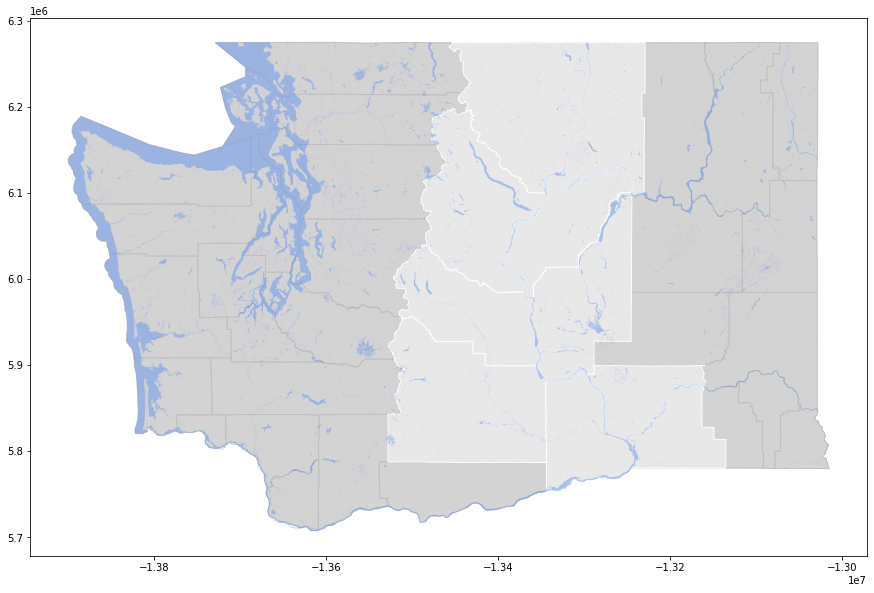

In [18]:
fig,ax = plt.subplots(figsize = (15,10))
counties.plot(ax = ax, color = 'lightgrey', edgecolors = 'silver')
counties_sub.plot(ax = ax, color = '#E8E8E8', edgecolors = 'white')
water.plot(ax = ax, color = 'cornflowerblue', alpha = 0.5)
#apples.plot(ax = ax, color = 'red')

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


1

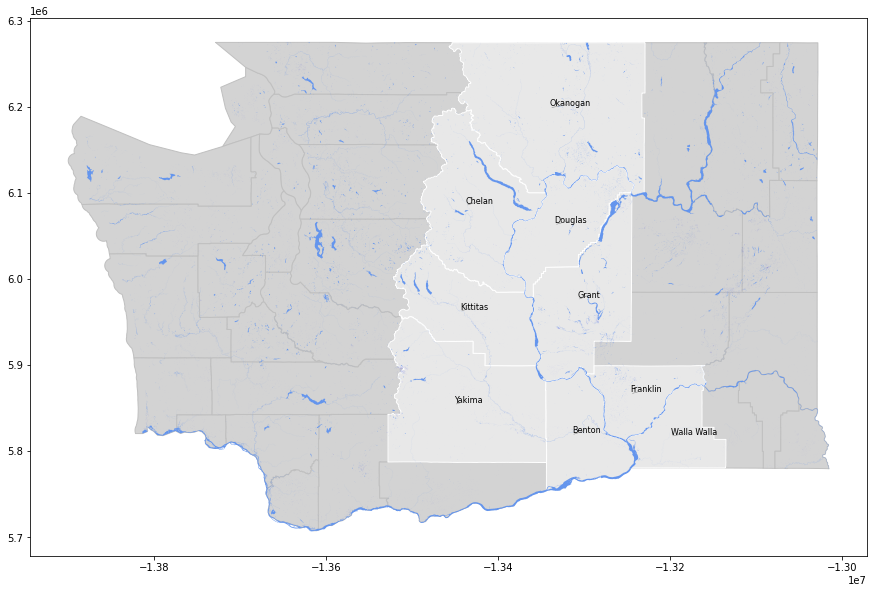

In [10]:
# with county boundaries
fig,ax = plt.subplots(figsize = (15,10))
counties.plot(ax = ax, color = 'lightgrey', edgecolors = 'silver')
counties_sub.plot(ax = ax, color = '#E8E8E8', edgecolors = 'white')
water_lakes_rivers.plot(ax = ax, color = 'cornflowerblue')

# county names
counties_sub["center"] = counties_sub["geometry"].centroid
counties_sub_points = counties_sub.copy()
counties_sub_points.set_geometry("center", inplace = True)
texts = []
for x, y, label in zip(counties_sub_points.geometry.x, counties_sub_points.geometry.y, counties_sub_points ['JURISDIC_2']):
    texts.append(plt.text(x-10000, y, label, fontsize = 8))
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))